21BAI1200_SHAURYA SHEKHAR

Part_a

In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8747, 0.0240],
        [0.6889, 0.8328]]) 



In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4065, 0.5489, 0.6243],
        [0.3486, 0.3478, 0.3412]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


In [8]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [12]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [13]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
n = np.ones(5)
t = torch.from_numpy(n)

In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [17]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


In [18]:
prediction = model(data) # forward pass

In [19]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [20]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [21]:
optim.step() #gradient descent

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [24]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0103, -0.1624, -0.0735, -0.0299, -0.0466,  0.1262,  0.0947, -0.0783,
          0.0544, -0.0106]], grad_fn=<AddmmBackward0>)


In [25]:
import torch
import torchvision
import torchvision.transforms as transforms

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:18<00:00, 9451643.86it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


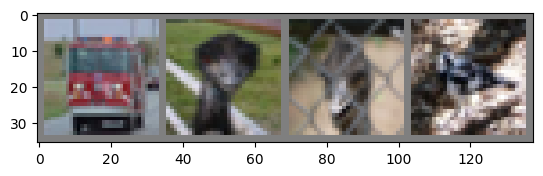

truck bird  bird  bird 


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Part_b


In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


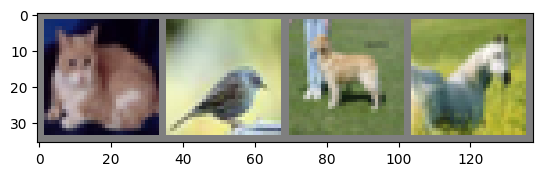

cat   bird  dog   horse


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [32]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [33]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [35]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels] to the DEVICE -- GPI
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.183
[1,  4000] loss: 1.902
[1,  6000] loss: 1.706
[1,  8000] loss: 1.583
[1, 10000] loss: 1.513
[1, 12000] loss: 1.469
[2,  2000] loss: 1.380
[2,  4000] loss: 1.359
[2,  6000] loss: 1.339
[2,  8000] loss: 1.322
[2, 10000] loss: 1.321
[2, 12000] loss: 1.266
Finished Training


In [36]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

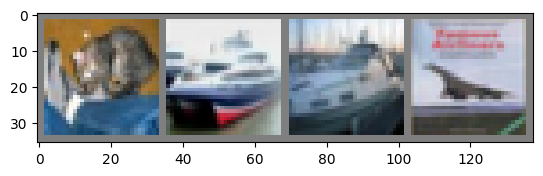

GroundTruth:  cat   ship  ship  plane


In [37]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Part_c

In [38]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 159MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [39]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [40]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 3.5608e-02, -2.2878e-01, -3.2326e-01,  5.5473e-02,  1.1363e-01,
        -2.8251e-01,  6.1544e-01,  6.0953e-02,  9.4566e-01, -1.4981e+00,
        -5.5102e-01, -3.6589e-02, -1.2635e+00, -3.1757e-02,  5.3338e-01,
         1.8749e-01,  4.9309e-01, -2.8286e-01, -2.7196e-01, -2.6181e-01,
        -3.3155e-01, -7.5721e-02,  6.7103e-02, -5.7090e-01, -5.3175e-01,
        -4.9966e-02,  7.2163e-01,  1.1626e+00,  5.1519e-01,  1.3022e+00,
         6.9073e-01,  5.5678e-01,  1.3273e-01, -7.1238e-01, -5.0567e-01,
        -2.4467e-01, -5.9905e-01,  1.9404e-01, -3.2087e-01,  6.1736e-01,
         2.9624e-01, -2.4294e-01,  1.8518e-01, -4.5889e-01,  1.5296e-01,
        -6.8361e-01,  9.9018e-01,  6.1653e-01, -1.2935e+00, -4.6650e-01,
        -7.1417e-02, -3.4094e-04,  3.7411e-01,  1.8117e-01,  8.5821e-01,
         1.0058e+00, -3.0185e-01,  1.9625e-02,  7.9076e-02,  8.1202e-01,
         7.7451e-01, -7.0558e-01, -2.2717e-01, -2.5871e-01,  1.5508e-01,
        -4.5723e-01,  7.8180e-01,  1.4157e-01,  1.0

In [41]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-07 18:03:56--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-07 18:03:56 (71.1 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [42]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.9378382563591003
Pomeranian 0.008283416740596294
Great Pyrenees 0.005603071302175522
Arctic fox 0.005527789704501629
white wolf 0.004741060547530651


In [43]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Define a dictionary to map animal names to new names
animal_name_mapping = {
    "tiger": "big cat",
    "elephant": "large mammal",
    "lion": "big cat",
    "giraffe": "tall mammal",
    "zebra": "striped mammal",
    "dog": "domestic animal",
    "cat": "domestic animal",
    "horse": "large mammal",
    "panda": "bear",
    "koala": "bear",
    # Add more animal mappings here
    "cheetah": "fast cat",
    "rhinoceros": "horned mammal",
    "hippopotamus": "water-loving mammal",
    "kangaroo": "hopping marsupial",
    "penguin": "flightless bird"
}

# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    original_category = categories[top5_catid[i]]
    new_category = animal_name_mapping.get(original_category, original_category)
    print(new_category, top5_prob[i].item())


Samoyed 0.9378382563591003
Pomeranian 0.008283416740596294
Great Pyrenees 0.005603071302175522
Arctic fox 0.005527789704501629
white wolf 0.004741060547530651


In [44]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/hybridnets.jpg", "HYBRIDNETS.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [45]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-1.2552e+00, -1.3286e-01, -1.2730e+00, -1.0349e+00,  3.1230e-02,
         6.1833e-02, -6.3321e-01, -6.4292e-01, -1.0781e+00, -1.6215e-02,
         1.6734e-01, -7.3069e-01, -7.1639e-01, -3.1778e-01,  1.5718e-01,
        -6.0671e-01, -8.7002e-01, -5.6015e-01, -5.3650e-01, -1.0011e+00,
        -3.4819e-01, -2.8132e-01, -1.4642e+00, -1.4143e+00, -8.9545e-01,
        -2.5373e-01, -5.5994e-01,  7.9585e-01,  7.8898e-01, -6.5961e-01,
         5.4477e-01, -6.9171e-01, -3.2969e-01, -9.4127e-01, -8.9940e-01,
         1.6333e-01,  2.8648e-01,  1.3777e-01,  1.3297e+00, -1.7291e-01,
        -4.7661e-01,  4.9386e-01,  1.0631e-01, -5.2295e-03, -4.6038e-01,
         6.7113e-02,  1.1163e-01, -7.4633e-01, -1.2481e+00, -8.6626e-01,
        -4.2927e-01, -7.2831e-01, -6.7376e-01, -2.9146e-01,  3.5236e-01,
        -6.0426e-01, -6.7270e-01, -7.7998e-01,  8.0164e-01,  2.8898e-01,
        -3.5890e-01, -9.3547e-01, -7.6137e-01, -2.0968e-01, -1.3045e+00,
        -4.4266e-01, -6.1803e-01,  5.8223e-01, -5.2

In [46]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-07 18:03:57--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-07 18:03:57 (73.7 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



In [47]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

web site 0.17435477674007416
envelope 0.1410498321056366
binder 0.061420805752277374
menu 0.052592068910598755
file 0.032372862100601196


Part_d

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else
"cpu")


Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Epoch 1, VGG16 Loss: nan, VGG16 Accuracy: 10.0


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Epoch 2, VGG16 Loss: nan, VGG16 Accuracy: 10.0


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Epoch 3, VGG16 Loss: nan, VGG16 Accuracy: 10.0


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Epoch 4, VGG16 Loss: nan, VGG16 Accuracy: 10.0


  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.

Epoch 5, VGG16 Loss: nan, VGG16 Accuracy: 10.0


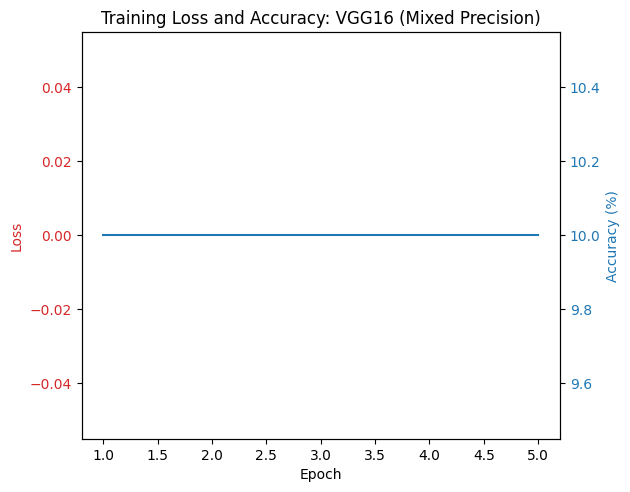

In [51]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224))      # Resize to match InceptionV1 input size
])

# Load CIFAR-10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True, num_workers=4)

# Define VGG16 model with mixed precision training
vgg16_model = torchvision.models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, 10)  # Change output layer to have 10 classes
vgg16_model = nn.DataParallel(vgg16_model)  # Utilize multiple GPUs if available
vgg16_model.to(device)
vgg16_model = vgg16_model.half()  # Use float16 precision

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)

# Lists to store training losses and accuracies
vgg16_losses = []
vgg16_accuracies = []

# Train VGG16 model
vgg16_model.train()
for epoch in range(5):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():  # Use mixed precision training
            outputs = vgg16_model(inputs)
            loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    vgg16_losses.append(running_loss / len(train_loader))
    vgg16_accuracy = 100 * correct / total
    vgg16_accuracies.append(vgg16_accuracy)
    print(f"Epoch {epoch + 1}, VGG16 Loss: {vgg16_losses[-1]}, VGG16 Accuracy: {vgg16_accuracy}")

# Plot the training losses and accuracies
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(range(1, 6), vgg16_losses, color=color, label='VGG16 Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(range(1, 6), vgg16_accuracies, color=color, label='VGG16 Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Training Loss and Accuracy: VGG16 (Mixed Precision)')
plt.show()

Part_e

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 196/196 [00:17<00:00, 11.52it/s]


Epoch 1, ResNet18 Loss: 1.3746515688847523, ResNet18 Accuracy: 51.896


100%|██████████| 196/196 [00:16<00:00, 11.58it/s]


Epoch 2, ResNet18 Loss: 0.8345984260038454, ResNet18 Accuracy: 70.896


100%|██████████| 196/196 [00:17<00:00, 11.38it/s]


Epoch 3, ResNet18 Loss: 0.6542052401571857, ResNet18 Accuracy: 77.308


100%|██████████| 196/196 [00:16<00:00, 11.82it/s]


Epoch 4, ResNet18 Loss: 0.5319413789072815, ResNet18 Accuracy: 81.744


100%|██████████| 196/196 [00:16<00:00, 11.83it/s]


Epoch 5, ResNet18 Loss: 0.4294696269290788, ResNet18 Accuracy: 85.286


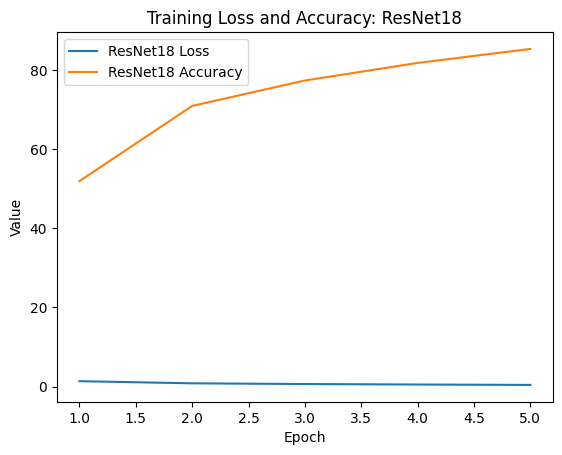

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32))  # Resize to match CIFAR-10 input
])

# Load CIFAR-10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=256, shuffle=True, num_workers=4)

# Define ResNet18 model
resnet18_model = torchvision.models.resnet18(pretrained=True)
num_ftrs = resnet18_model.fc.in_features
resnet18_model.fc = nn.Linear(num_ftrs, 10)  # Change output layer to have 10 classes
resnet18_model = resnet18_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18_model.parameters(), lr=0.001, momentum=0.9)

# Lists to store training losses and accuracies
resnet18_losses = []
resnet18_accuracies = []

# Train ResNet18 model
resnet18_model.train()
for epoch in range(5):
    running_loss = 0.0
    correct = 0
    total = 0

    # Correct indentation for inner loop
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet18_model(inputs)
        loss = criterion(outputs, labels.long())  # Convert labels to torch.long
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    resnet18_losses.append(running_loss / len(train_loader))
    resnet18_accuracy = 100 * correct / total
    resnet18_accuracies.append(resnet18_accuracy)
    print(f"Epoch {epoch+1}, ResNet18 Loss: {resnet18_losses[-1]}, ResNet18 Accuracy: {resnet18_accuracy}")

# Plot the training losses and accuracies
plt.plot(range(1, 6), resnet18_losses, label='ResNet18 Loss')
plt.plot(range(1, 6), resnet18_accuracies, label='ResNet18 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy: ResNet18')
plt.legend()
plt.show()


Part_f

Files already downloaded and verified


100%|██████████| 196/196 [00:15<00:00, 12.78it/s]


Epoch 1, VGG16 Loss: 1.0815574268297272, VGG16 Accuracy: 61.792
Epoch 1, GoogLeNet Loss: 1.997636531688729, GoogLeNet Accuracy: 29.758


100%|██████████| 196/196 [00:15<00:00, 12.55it/s]


Epoch 2, VGG16 Loss: 0.6380948083741325, VGG16 Accuracy: 77.896
Epoch 2, GoogLeNet Loss: 1.359222770953665, GoogLeNet Accuracy: 52.648


100%|██████████| 196/196 [00:15<00:00, 12.46it/s]


Epoch 3, VGG16 Loss: 0.5217893128188289, VGG16 Accuracy: 81.78
Epoch 3, GoogLeNet Loss: 1.0823048106869873, GoogLeNet Accuracy: 61.934


100%|██████████| 196/196 [00:15<00:00, 12.60it/s]


Epoch 4, VGG16 Loss: 0.45050860150736205, VGG16 Accuracy: 84.374
Epoch 4, GoogLeNet Loss: 0.926492726924468, GoogLeNet Accuracy: 67.36


100%|██████████| 196/196 [00:15<00:00, 12.57it/s]


Epoch 5, VGG16 Loss: 0.39080762292961685, VGG16 Accuracy: 86.436
Epoch 5, GoogLeNet Loss: 0.8109020463057927, GoogLeNet Accuracy: 71.648


100%|██████████| 196/196 [00:15<00:00, 12.81it/s]


Epoch 6, VGG16 Loss: 0.34478714165030694, VGG16 Accuracy: 88.104
Epoch 6, GoogLeNet Loss: 0.7156870051914331, GoogLeNet Accuracy: 74.844


100%|██████████| 196/196 [00:15<00:00, 12.80it/s]


Epoch 7, VGG16 Loss: 0.3018044678836453, VGG16 Accuracy: 89.494
Epoch 7, GoogLeNet Loss: 0.6357657587041661, GoogLeNet Accuracy: 77.822


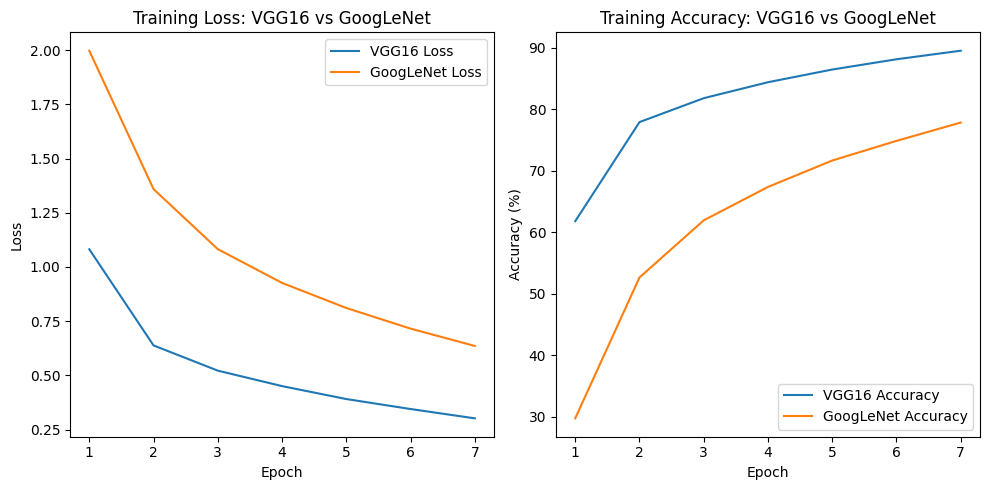

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32))  # Resize to match CIFAR-10 input size
])

# Load CIFAR-10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=256, shuffle=True, num_workers=4)

# Define VGG16 model
vgg16_model = torchvision.models.vgg16(pretrained=True)
vgg16_model.classifier[6] = nn.Linear(4096, 10)  # Change output layer to have 10 classes
vgg16_model = vgg16_model.to(device)

# Define GoogLeNet model
googlenet_model = torchvision.models.googlenet(pretrained=True)
googlenet_model.fc = nn.Linear(1024, 10)  # Change output layer to have 10 classes
googlenet_model = googlenet_model.to(device)

# Define loss function and optimizer for VGG16
criterion_vgg16 = nn.CrossEntropyLoss()
optimizer_vgg16 = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

# Define loss function and optimizer for GoogLeNet
criterion_googlenet = nn.CrossEntropyLoss()
optimizer_googlenet = optim.SGD(googlenet_model.parameters(), lr=0.001, momentum=0.9)

# Lists to store training losses and accuracies for VGG16 and GoogLeNet
vgg16_losses = []
vgg16_accuracies = []
googlenet_losses = []
googlenet_accuracies = []

# Train VGG16 and GoogLeNet models
vgg16_model.train()
googlenet_model.train()

for epoch in range(7):
    # Training for VGG16
    running_loss_vgg16 = 0.0
    correct_vgg16 = 0
    total_vgg16 = 0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_vgg16.zero_grad()
        outputs_vgg16 = vgg16_model(inputs)
        loss_vgg16 = criterion_vgg16(outputs_vgg16, labels)
        loss_vgg16.backward()
        optimizer_vgg16.step()
        running_loss_vgg16 += loss_vgg16.item()

        # Calculate training accuracy for VGG16
        _, predicted_vgg16 = outputs_vgg16.max(1)
        total_vgg16 += labels.size(0)
        correct_vgg16 += predicted_vgg16.eq(labels).sum().item()

    vgg16_losses.append(running_loss_vgg16 / len(train_loader))
    vgg16_accuracy = 100 * correct_vgg16 / total_vgg16
    vgg16_accuracies.append(vgg16_accuracy)

    # Training for GoogLeNet
    running_loss_googlenet = 0.0
    correct_googlenet = 0
    total_googlenet = 0
    for i, data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_googlenet.zero_grad()
        outputs_googlenet = googlenet_model(inputs)
        loss_googlenet = criterion_googlenet(outputs_googlenet, labels)
        loss_googlenet.backward()
        optimizer_googlenet.step()
        running_loss_googlenet += loss_googlenet.item()

        # Calculate training accuracy for GoogLeNet
        _, predicted_googlenet = outputs_googlenet.max(1)
        total_googlenet += labels.size(0)
        correct_googlenet += predicted_googlenet.eq(labels).sum().item()

    googlenet_losses.append(running_loss_googlenet / len(train_loader))
    googlenet_accuracy = 100 * correct_googlenet / total_googlenet
    googlenet_accuracies.append(googlenet_accuracy)

    print(f"Epoch {epoch+1}, VGG16 Loss: {vgg16_losses[-1]}, VGG16 Accuracy: {vgg16_accuracy}")
    print(f"Epoch {epoch+1}, GoogLeNet Loss: {googlenet_losses[-1]}, GoogLeNet Accuracy: {googlenet_accuracy}")

# Plot the training losses and accuracies for VGG16 and GoogLeNet
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 8), vgg16_losses, label='VGG16 Loss')
plt.plot(range(1, 8), googlenet_losses, label='GoogLeNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss: VGG16 vs GoogLeNet')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, 8), vgg16_accuracies, label='VGG16 Accuracy')
plt.plot(range(1, 8), googlenet_accuracies, label='GoogLeNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy: VGG16 vs GoogLeNet')
plt.legend()
plt.tight_layout()
plt.show()
